<a href="https://colab.research.google.com/github/Rafat-Hossain-Reyal/ML_LAB/blob/main/ML_lab_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Train-Test Split
Splits the dataset into training and test sets while keeping class balance using stratification.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)

Train Logistic Regression (Default C=1)
Trains a logistic regression model and evaluates accuracy on training and test sets.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
print("Train score:", logreg.score(X_train, y_train))
print("Test score:", logreg.score(X_test, y_test))

Train score: 0.9577464788732394
Test score: 0.958041958041958


Try with High C (Less Regularization)
Higher C means less regularization. The model fits training data more closely.

In [ ]:
logreg100 = LogisticRegression(C=100, max_iter=10000)
logreg100.fit(X_train, y_train)
print("Train score:", logreg100.score(X_train, y_train))
print("Test score:", logreg100.score(X_test, y_test))

Train score: 0.9788732394366197
Test score: 0.965034965034965


 Try with Low C (More Regularization)
Lower C applies stronger regularization, simplifying the model and possibly reducing overfitting.

In [ ]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000)
logreg001.fit(X_train, y_train)
print("Train score:", logreg001.score(X_train, y_train))
print("Test score:", logreg001.score(X_test, y_test))

Train score: 0.9530516431924883
Test score: 0.951048951048951


Plot the Coefficients
Shows how model weights (feature importance) change with different values of C.

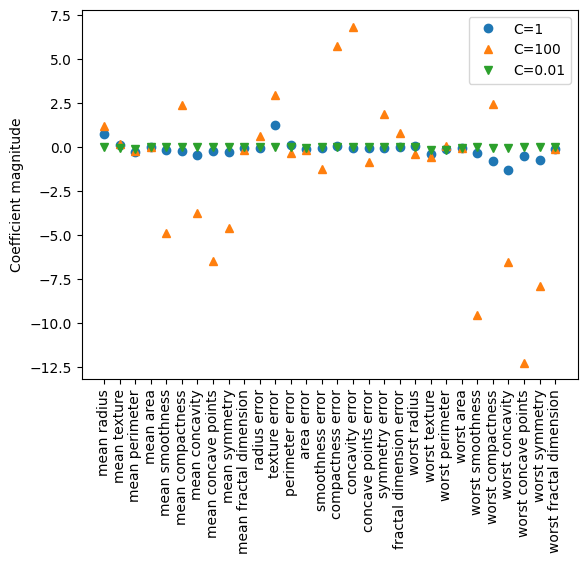

In [ ]:
import matplotlib.pyplot as plt
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

 L1 Regularization (Feature Selection)
L1 regularization sets some coefficients to exactly zero, helping with feature selection.

In [ ]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.001)
logreg_l1.fit(X_train, y_train)
print("Train score:", logreg_l1.score(X_train, y_train))
print("Test score:", logreg_l1.score(X_test, y_test))

Train score: 0.9131455399061033
Test score: 0.9230769230769231


Plot L1 Coefficients
Plots the L1 model's coefficients. Many are zero, showing which features are ignored.

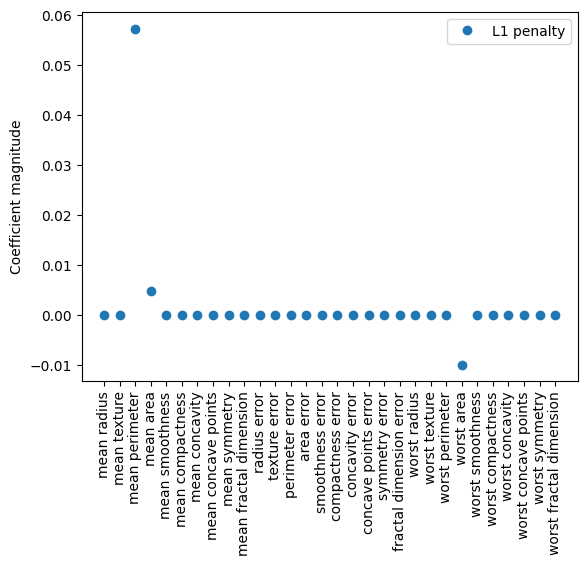

In [ ]:
plt.plot(logreg_l1.coef_.T, 'o', label="L1 penalty")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()